In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
titanic_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
#first 5 rows
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#number of rows and columns
titanic_data.shape

(891, 12)

In [5]:
#getting info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
print(titanic_data['Embarked'].mode()[0])

S


In [11]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
sns.set()

<AxesSubplot: xlabel='Survived', ylabel='count'>

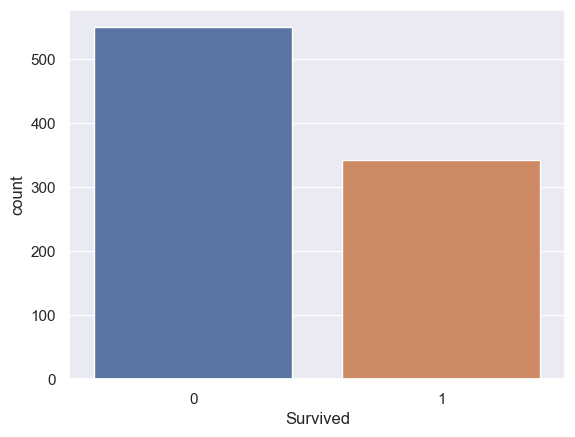

In [15]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot: xlabel='Sex', ylabel='count'>

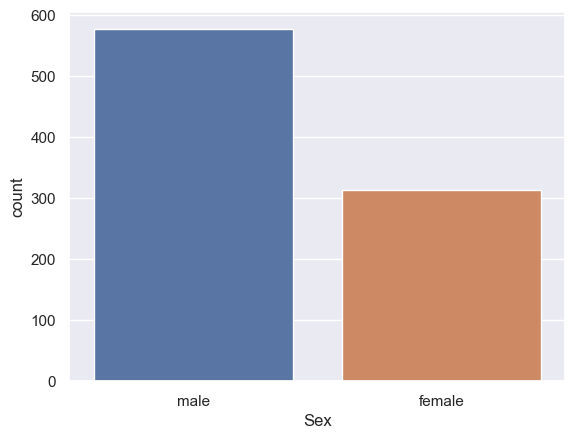

In [16]:
sns.countplot(x='Sex', data=titanic_data)

<AxesSubplot: xlabel='Sex', ylabel='count'>

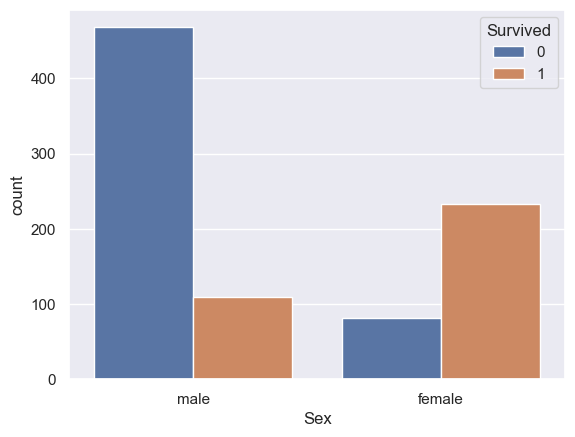

In [17]:
sns.countplot(x='Sex', hue = 'Survived', data=titanic_data)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

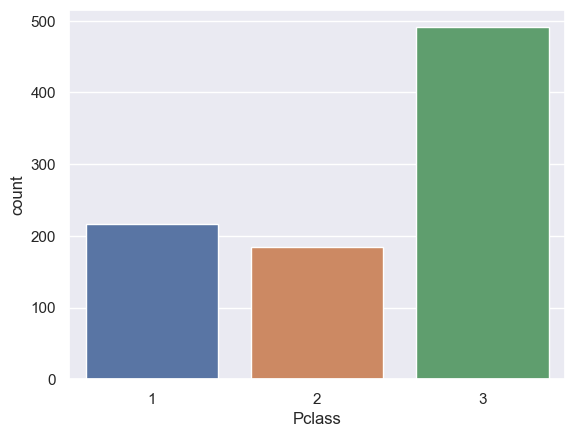

In [18]:
sns.countplot(x='Pclass', data=titanic_data)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

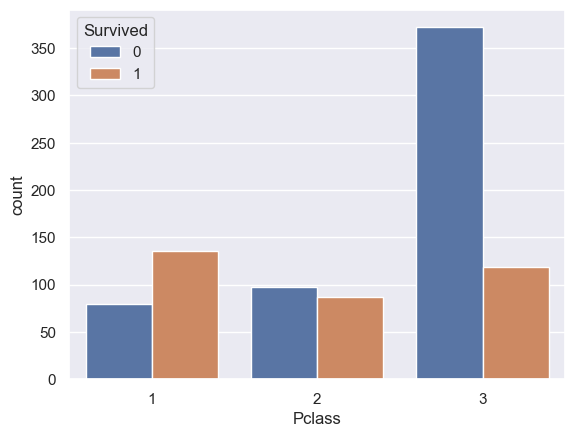

In [19]:
sns.countplot(x='Pclass', hue = 'Survived', data=titanic_data)

In [20]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [23]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0

In [24]:
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y= titanic_data['Survived']

In [25]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [26]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (668, 7) (223, 7)


In [29]:
print(Y_test)

707    1
37     0
615    1
169    0
68     1
      ..
273    0
699    0
877    0
791    0
573    1
Name: Survived, Length: 223, dtype: int64


# Logistic Regression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
print(X_test)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
707       1    0  42.000000      0      0  26.2875         0
37        3    0  21.000000      0      0   8.0500         0
615       2    1  24.000000      1      2  65.0000         0
169       3    0  28.000000      0      0  56.4958         0
68        3    1  17.000000      4      2   7.9250         0
..      ...  ...        ...    ...    ...      ...       ...
273       1    0  37.000000      0      1  29.7000         1
699       3    0  42.000000      0      0   7.6500         0
877       3    0  19.000000      0      0   7.8958         0
791       2    0  16.000000      0      0  26.0000         0
573       3    1  29.699118      0      0   7.7500         2

[223 rows x 7 columns]


In [38]:
pp = model.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT survived", sum(pp==0))

Survived 71
NOT survived 152


array([[118,  13],
       [ 34,  58]], dtype=int64)

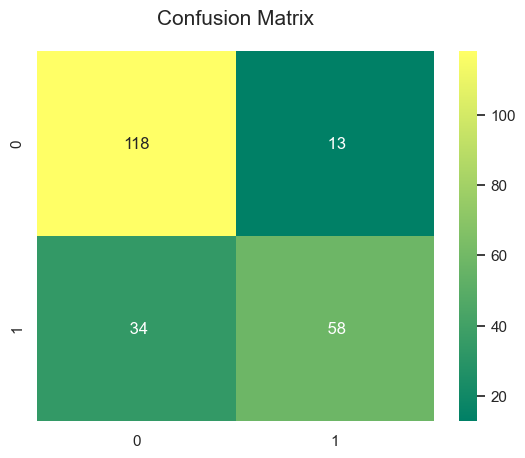

In [39]:
cm = confusion_matrix(Y_test,pp)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(Y_test,pp),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=15)
cm

In [40]:
prediction_lr=model.predict(X_test)
print('The accuracy of the model is',round(accuracy_score(prediction_lr,Y_test)*100,2))

The accuracy of the model is 78.92


Prediction for the test data

In [41]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_test})
submission['Survived'] = submission['Survived'].fillna(0)
submission['PassengerId'] = submission['PassengerId'].fillna(0)
submission

PassengerId  Survived
0          892.0       0.0
1          893.0       1.0
2          894.0       0.0
3          895.0       0.0
4          896.0       0.0
..           ...       ...
873          0.0       0.0
876          0.0       0.0
877          0.0       0.0
887          0.0       1.0
889          0.0       1.0

[540 rows x 2 columns]

Testing random individuals

In [46]:
input_data = (1,1,55,1,0,59.4,1)

In [47]:
input_data_as_numpy_array = np.asarray(input_data)

In [48]:
ire = input_data_as_numpy_array.reshape(1,-1)

In [49]:
prediction = model.predict(ire)

if prediction[0] == 0:
    print("Dead")

if prediction[0]==1:
    print("Alive")

Alive


C:\users\pmust\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
